In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.visualization import tumor_misfit_barplot
from src.utils.equations import tumor_misfit_error

In [3]:
CELL_TYPES = ['Keratin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_PATH = "../../data/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, tumor_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

In [4]:
#res = pc[:, 0:3].dot(pca.components_[0:3, :])
n_comp = 3
res = np.dot(pc[:,:n_comp], pca.components_[:n_comp,:]) + np.mean(sites, axis=0)

In [5]:
np.subtract(sites, res)

array([[-2.44154924e+00,  2.43795949e-15,  7.65400441e-01, ...,
        -2.74782199e+00, -4.13393732e-01,  2.21340795e-01],
       [-1.99322794e+00,  2.31455458e-15,  5.65557416e+00, ...,
        -7.54390799e-01, -4.97615927e-01,  9.90145692e-02],
       [ 1.64709489e+00,  7.76876955e-15,  2.28835406e+01, ...,
        -2.70128980e+00, -1.53505595e+00,  1.83888219e+00],
       ...,
       [ 1.03176165e+00,  3.86140532e-15,  4.93822958e+00, ...,
        -1.38077813e+00, -8.84103926e-01,  2.87667837e-01],
       [-5.01501315e-01,  5.94519788e-16,  2.03317957e+01, ...,
        -3.34616485e+00, -1.62050986e+00, -2.03488516e-01],
       [ 1.58281826e+00,  2.46155439e-15,  4.84717721e+00, ...,
        -2.58328889e+00, -1.39615563e+00, -5.38025320e-01]])

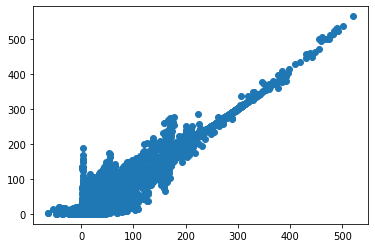

In [6]:
#control scatter plot
plt.scatter(res.flatten(), sites.flatten())
plt.show()

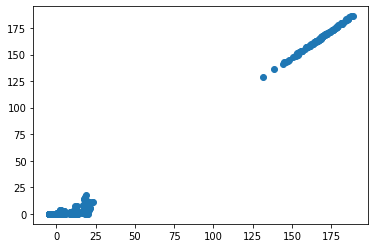

In [7]:
#control scatter plot
tumor_id = 15
plt.scatter(res[np.where(tumor_ids == tumor_id)[0]].flatten(), sites[np.where(tumor_ids == tumor_id)[0]].flatten())
plt.show()

In [12]:
#n_comp = 3
#res = np.dot(pc[:,:n_comp], pca.components_[:n_comp,:]) + np.mean(sites, axis=0)

In [8]:
e = np.array([tumor_misfit_error(sites[np.where(tumor_ids == p_id)[0], :], res[np.where(tumor_ids == p_id)[0], :]) for p_id in full_patient_ids])


908797.79
22120.22
495062.4600000001
1033644.09
654690.89
662298.46
73371.51999999999
137260.41
792566.45
109954.32
123761.56
237362.73
304920.63
103507.59
15463.179999999998
1074115.93
664819.99
33178.44
327717.42
411483.27
296873.35
91700.37
210575.95
82624.92
310210.89999999997
836977.39
193702.97
2704010.58
303836.56
167742.16
233022.51
98380.87000000001
188514.93
4101859.08
141792.95
559718.59
221080.89
223377.46
291614.67000000004
111703.78


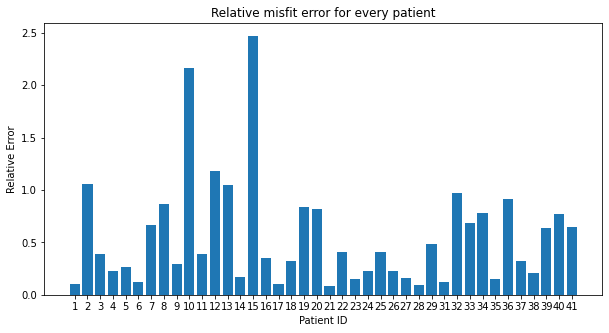

In [9]:
tumor_misfit_barplot(full_patient_ids, e)

<AxesSubplot:ylabel='Count'>

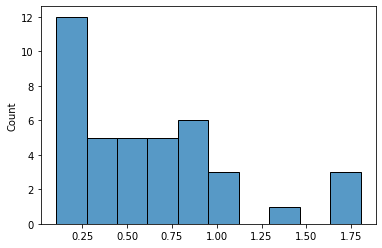

In [25]:
import seaborn as sns
sns.histplot(e, bins=10)